In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
cifar10 = keras.datasets.cifar10

In [4]:
(X_train_full,y_train_full),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [5]:
X_train_full.shape

(50000, 32, 32, 3)

In [6]:
X_train_full[0,:,:]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [0]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [0]:
X_valid,X_train = X_train_full[:5000],X_train_full[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

### Model Building

#### Model 1

In [0]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(0,20):
  model1.add(keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"))
model1.add(keras.layers.Dense(10,activation="softmax"))

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [0]:
model1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Nadam(),
    metrics=['accuracy']
)

In [12]:
callback_es = keras.callbacks.EarlyStopping(patience=10)
history = model1.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[callback_es])

Train on 45000 samples, validate on 10000 samples
Epoch 1/50
45000/45000 [==============================] - 20s 436us/sample - loss: 2.0736 - accuracy: 0.2472 - val_loss: 2.0329 - val_accuracy: 0.2592
Epoch 2/50
45000/45000 [==============================] - 17s 380us/sample - loss: 1.8465 - accuracy: 0.3285 - val_loss: 1.8968 - val_accuracy: 0.3136
Epoch 3/50
45000/45000 [==============================] - 17s 379us/sample - loss: 1.7750 - accuracy: 0.3546 - val_loss: 2.0860 - val_accuracy: 0.3284
Epoch 4/50
45000/45000 [==============================] - 17s 384us/sample - loss: 1.7296 - accuracy: 0.3754 - val_loss: 1.8137 - val_accuracy: 0.3527
Epoch 5/50
45000/45000 [==============================] - 17s 387us/sample - loss: 1.6917 - accuracy: 0.3923 - val_loss: 1.6632 - val_accuracy: 0.4217
Epoch 6/50
45000/45000 [==============================] - 17s 388us/sample - loss: 1.6631 - accuracy: 0.4028 - val_loss: 1.6863 - val_accuracy: 0.3949
Epoch 7/50
45000/45000 [====================

In [13]:
history.history

{'accuracy': [0.2472,
  0.32846665,
  0.35455555,
  0.37544444,
  0.3922889,
  0.4028,
  0.41284445,
  0.421,
  0.4302222,
  0.43802223,
  0.41373333,
  0.44337776,
  0.45422223,
  0.45464444,
  0.40497777,
  0.30993333,
  0.30306667,
  0.3591111,
  0.3874889,
  0.40473333,
  0.41726667,
  0.4256,
  0.43266666,
  0.44213334,
  0.4443111,
  0.45015556,
  0.45848888,
  0.46286666,
  0.4702889,
  0.4748,
  0.48046666,
  0.48262224,
  0.49122223,
  0.4934222,
  0.49877778,
  0.5073111,
  0.5102,
  0.5146222,
  0.5140667,
  0.4678889,
  0.34157777,
  0.40586665,
  0.42902222,
  0.4409111,
  0.4531111],
 'loss': [2.073608309088813,
  1.8464788941489325,
  1.7750069734785292,
  1.729640597682529,
  1.691675224410163,
  1.6631307713402643,
  1.6465893209669324,
  1.615837583118015,
  1.5964319925308228,
  1.580019984181722,
  1.6297847083621555,
  1.5616513815350002,
  1.5343362525728015,
  1.5328168727874756,
  1.648109813457065,
  16.098547460513643,
  1.826193327861362,
  1.7280490763770209

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)

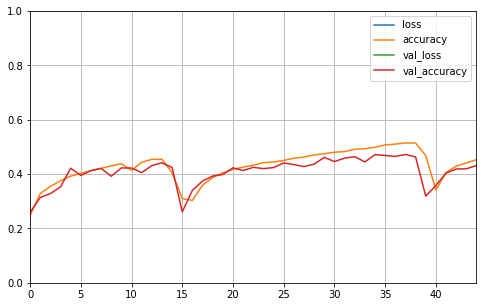

In [15]:
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#### model 2

In [0]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for i in range(0,20):
  model2.add(keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(10,activation="softmax"))

In [0]:
model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Nadam(),
    metrics=['accuracy']
)

In [18]:
callback_es = keras.callbacks.EarlyStopping(patience=10)
history2 = model2.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[callback_es])

Train on 45000 samples, validate on 10000 samples
Epoch 1/50
45000/45000 [==============================] - 21s 462us/sample - loss: 2.0240 - accuracy: 0.2137 - val_loss: 2.0949 - val_accuracy: 0.1761
Epoch 2/50
45000/45000 [==============================] - 18s 405us/sample - loss: 1.9842 - accuracy: 0.2099 - val_loss: 2.0793 - val_accuracy: 0.1913
Epoch 3/50
45000/45000 [==============================] - 18s 404us/sample - loss: 1.9760 - accuracy: 0.2073 - val_loss: 1.9931 - val_accuracy: 0.1984
Epoch 4/50
45000/45000 [==============================] - 18s 395us/sample - loss: 1.9552 - accuracy: 0.2205 - val_loss: 1.9368 - val_accuracy: 0.2296
Epoch 5/50
45000/45000 [==============================] - 18s 395us/sample - loss: 1.9364 - accuracy: 0.2333 - val_loss: 1.9304 - val_accuracy: 0.2220
Epoch 6/50
45000/45000 [==============================] - 18s 395us/sample - loss: 1.9228 - accuracy: 0.2403 - val_loss: 4.4657 - val_accuracy: 0.1646
Epoch 7/50
45000/45000 [====================

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
history_df2 = pd.DataFrame(history2.history)

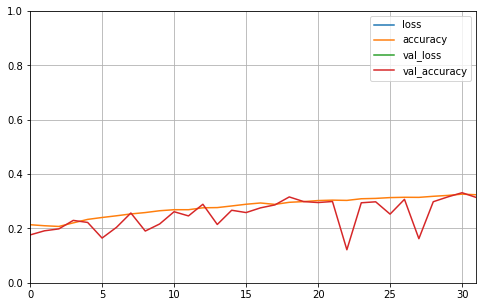

In [20]:
history_df2.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()